In [33]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\acer1\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [34]:
p = inflect.engine()
lemmatizer = WordNetLemmatizer()


In [35]:
def read_book(path):
    file = open(path,'r',encoding='utf-8')
    read = file.readlines()
    res = "".join(line for line in read)
    return res

In [47]:
def print_book_title_and_length(book):
  print(book[:40],len(book))

In [48]:
def discard_useless_part (text):
  sidx = text.find('*** START OF THE PROJECT ')
  eidx = text.find('*** END OF THE PROJECT ')
  print("Discarding Before - ", sidx)
  print("Discarding After - ", eidx)
  text = text[sidx:eidx]
  return text

In [49]:
def to_lower(text):
  return text.lower()

In [50]:
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

In [51]:
def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [52]:
def num2word(text):
  list_of_words = text.split()
  modified_text = []

  for word in list_of_words:
    if word.isdigit():
      number_in_word = p.number_to_words(word)
      modified_text.append(number_in_word)
    else:
      modified_text.append(word)
      
  return ' '.join(modified_text)

In [53]:
def remove_punctuation(text):
  tokens = word_tokenize(text)
  words = [word for word in tokens if word.isalpha()]
  return ' '.join(words)

In [54]:
def lemmatize_word(text): 
    word_tokens = word_tokenize(text)  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas) 
  

In [55]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [56]:
book_path = 'speech and language processing book.txt'
def PreProcessedBook(path):
  book = read_book(path)
  print_book_title_and_length(book)
  text = discard_useless_part(book)
  text = to_lower(text)
  text = remove_URL(text)
  text = decontracted(text)
  text = num2word(text)
  text = remove_punctuation(text)
  text = lemmatize_word(text)
  return (text)

In [57]:
book = read_book(book_path)
print(book[:5000])

1
Speech and Language Processing








  DRAFT

2
                                    AI PRENTICE HALL SERIES
                                                  IN ARTIFICIAL INTELLIGENCE
                                                  Stuart Russell and Peter Norvig, Editors







                                      ORSYTH & PONCE
                                        AHAM FDRAFTComputerVision:AModernApproachANSICommonLisp
                                      R
                                   G
                                   JURAFSKY &MARTIN              Speech and Language Processing
                                   NEAPOLITAN                           Learning Bayesian Networks
                                   RUSSELL & NORVIG               Artificial Intelligence: AModern Approach

3
    Speech and Language Processing
            An Int oduction to Natural
                      ational Linguistics, a rDRAFTLanguageProcessing,ndSpeechRecognition
             ompu

In [58]:
book_text = PreProcessedBook(book_path)

1
Speech and Language Processing







 4988822
Discarding Before -  5126
Discarding After -  4604495


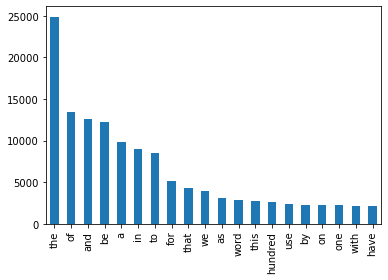

In [59]:
word_tokens = word_tokenize(book_text) 
pd.Series(word_tokens).value_counts()[:20].plot(kind='bar')

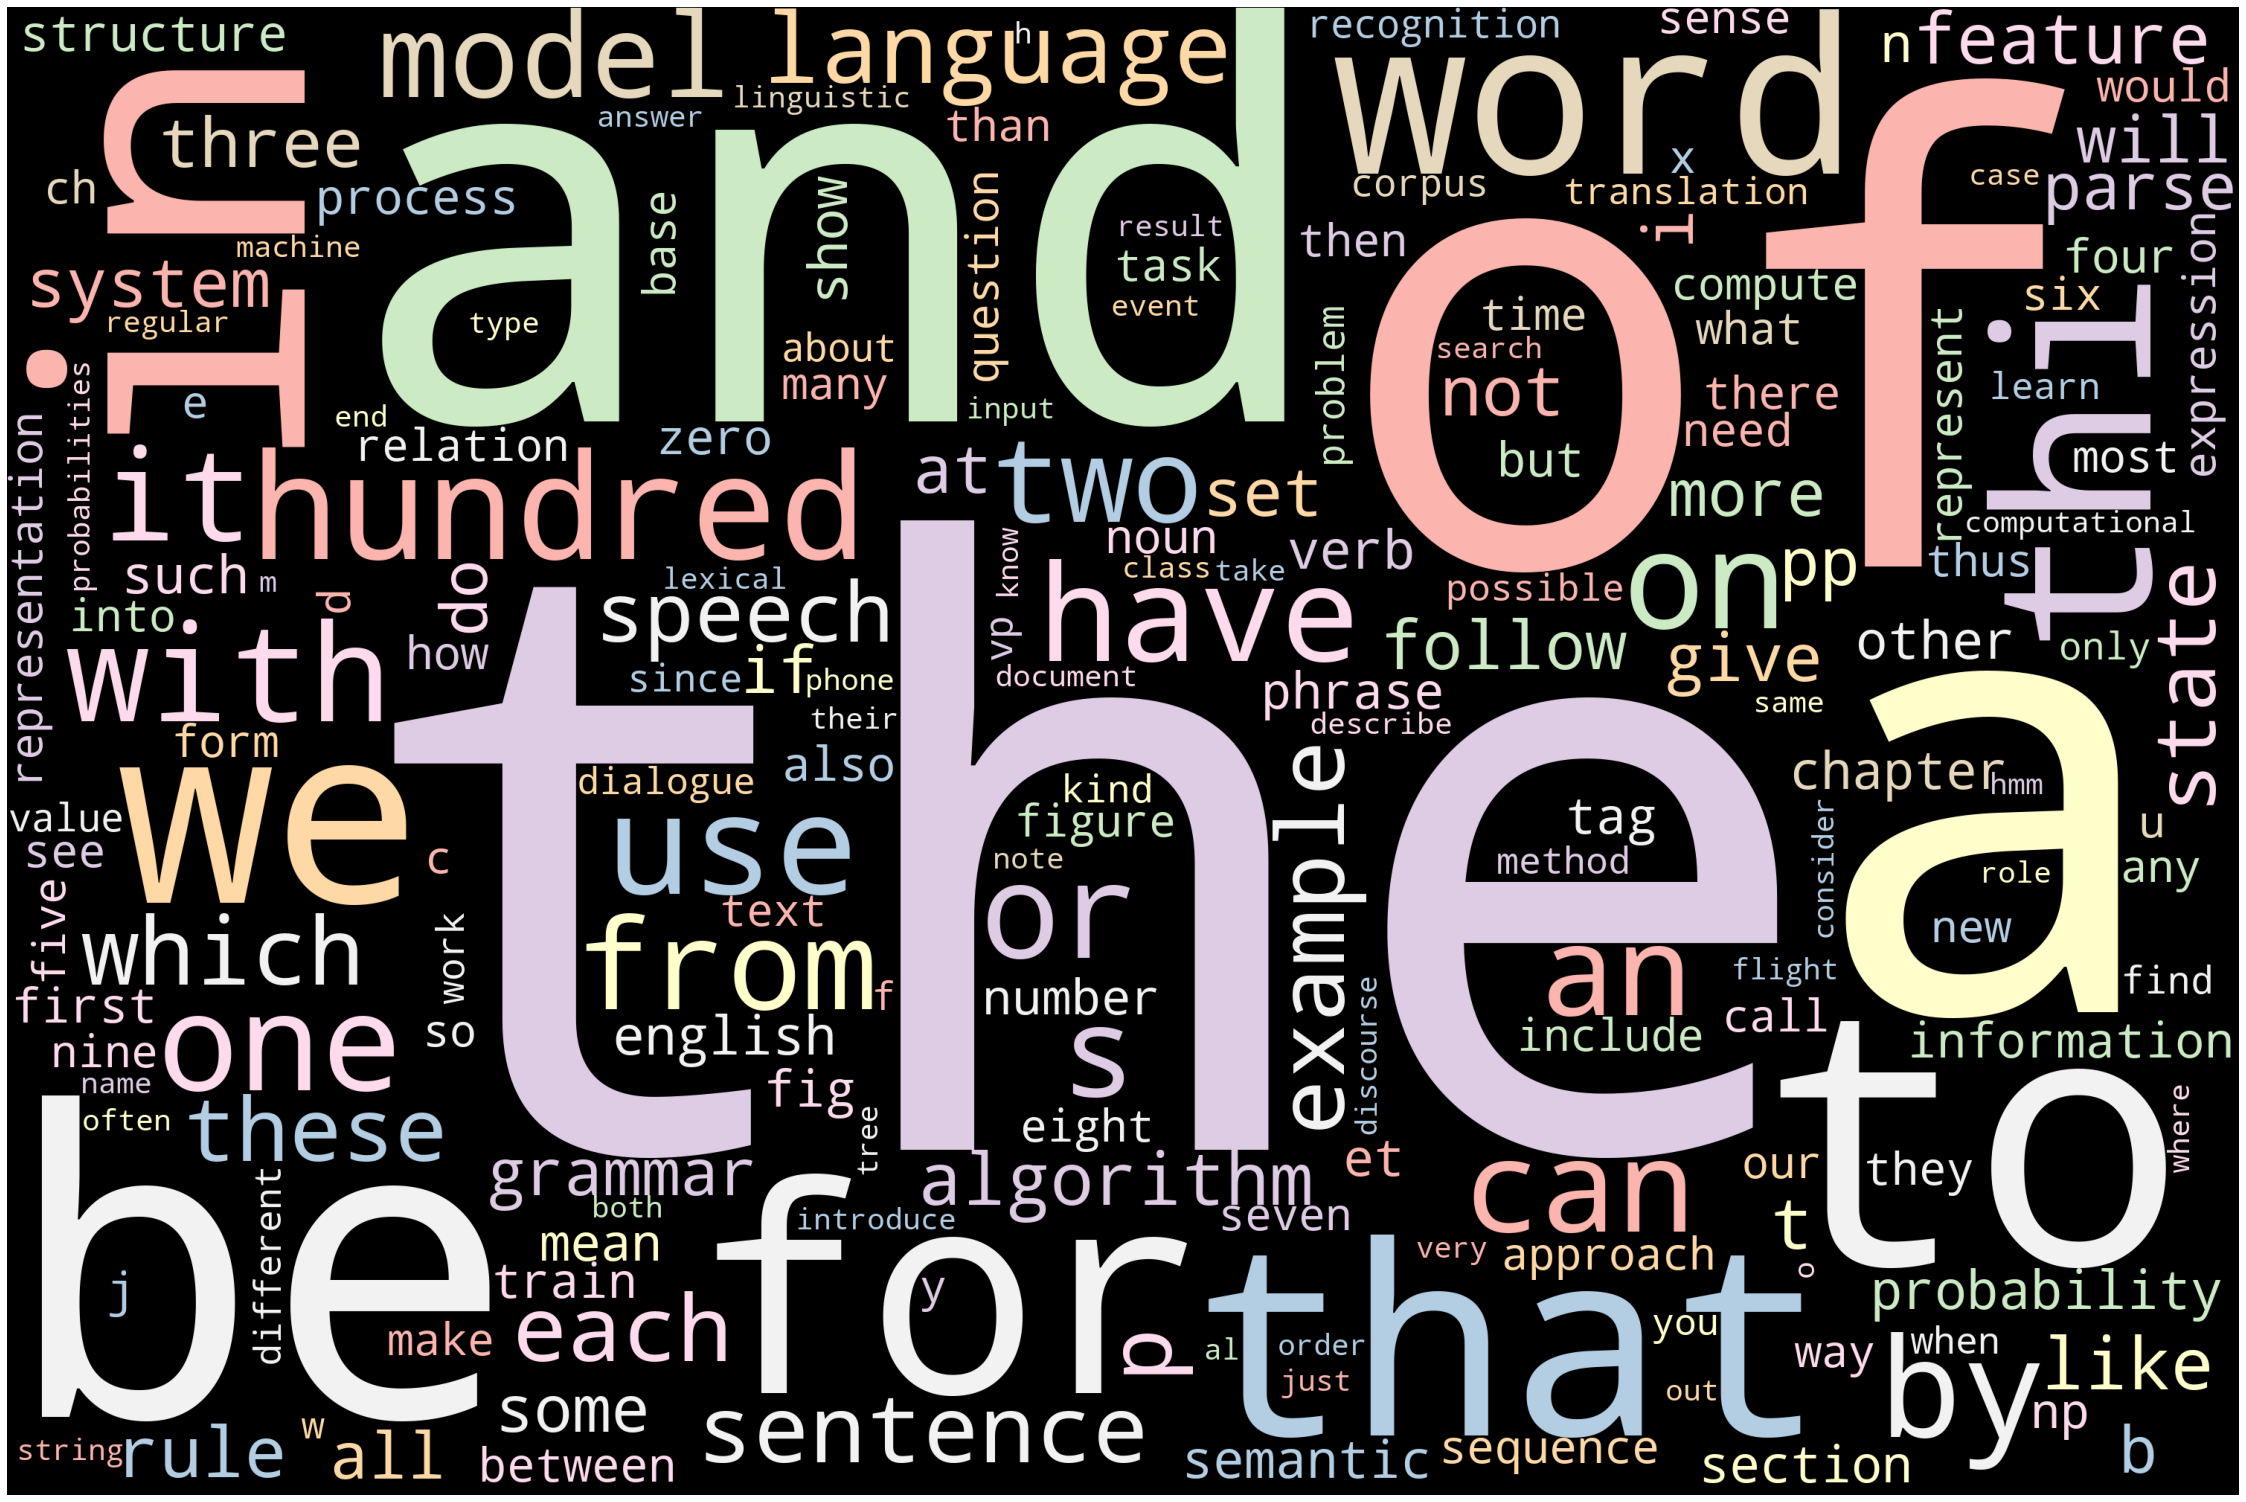

In [60]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(word_tokens))
# Plot
plot_cloud(wordcloud)

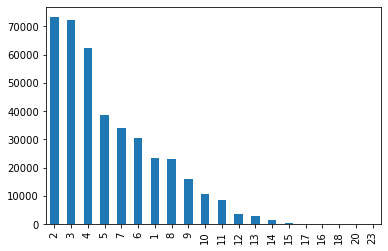

In [61]:
length = [len(word) for word in word_tokens]
pd.Series(length).value_counts()[:20].plot(kind='bar')

In [62]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in STOPWORDS]

In [63]:
word_tokens = remove_stopwords(word_tokens)

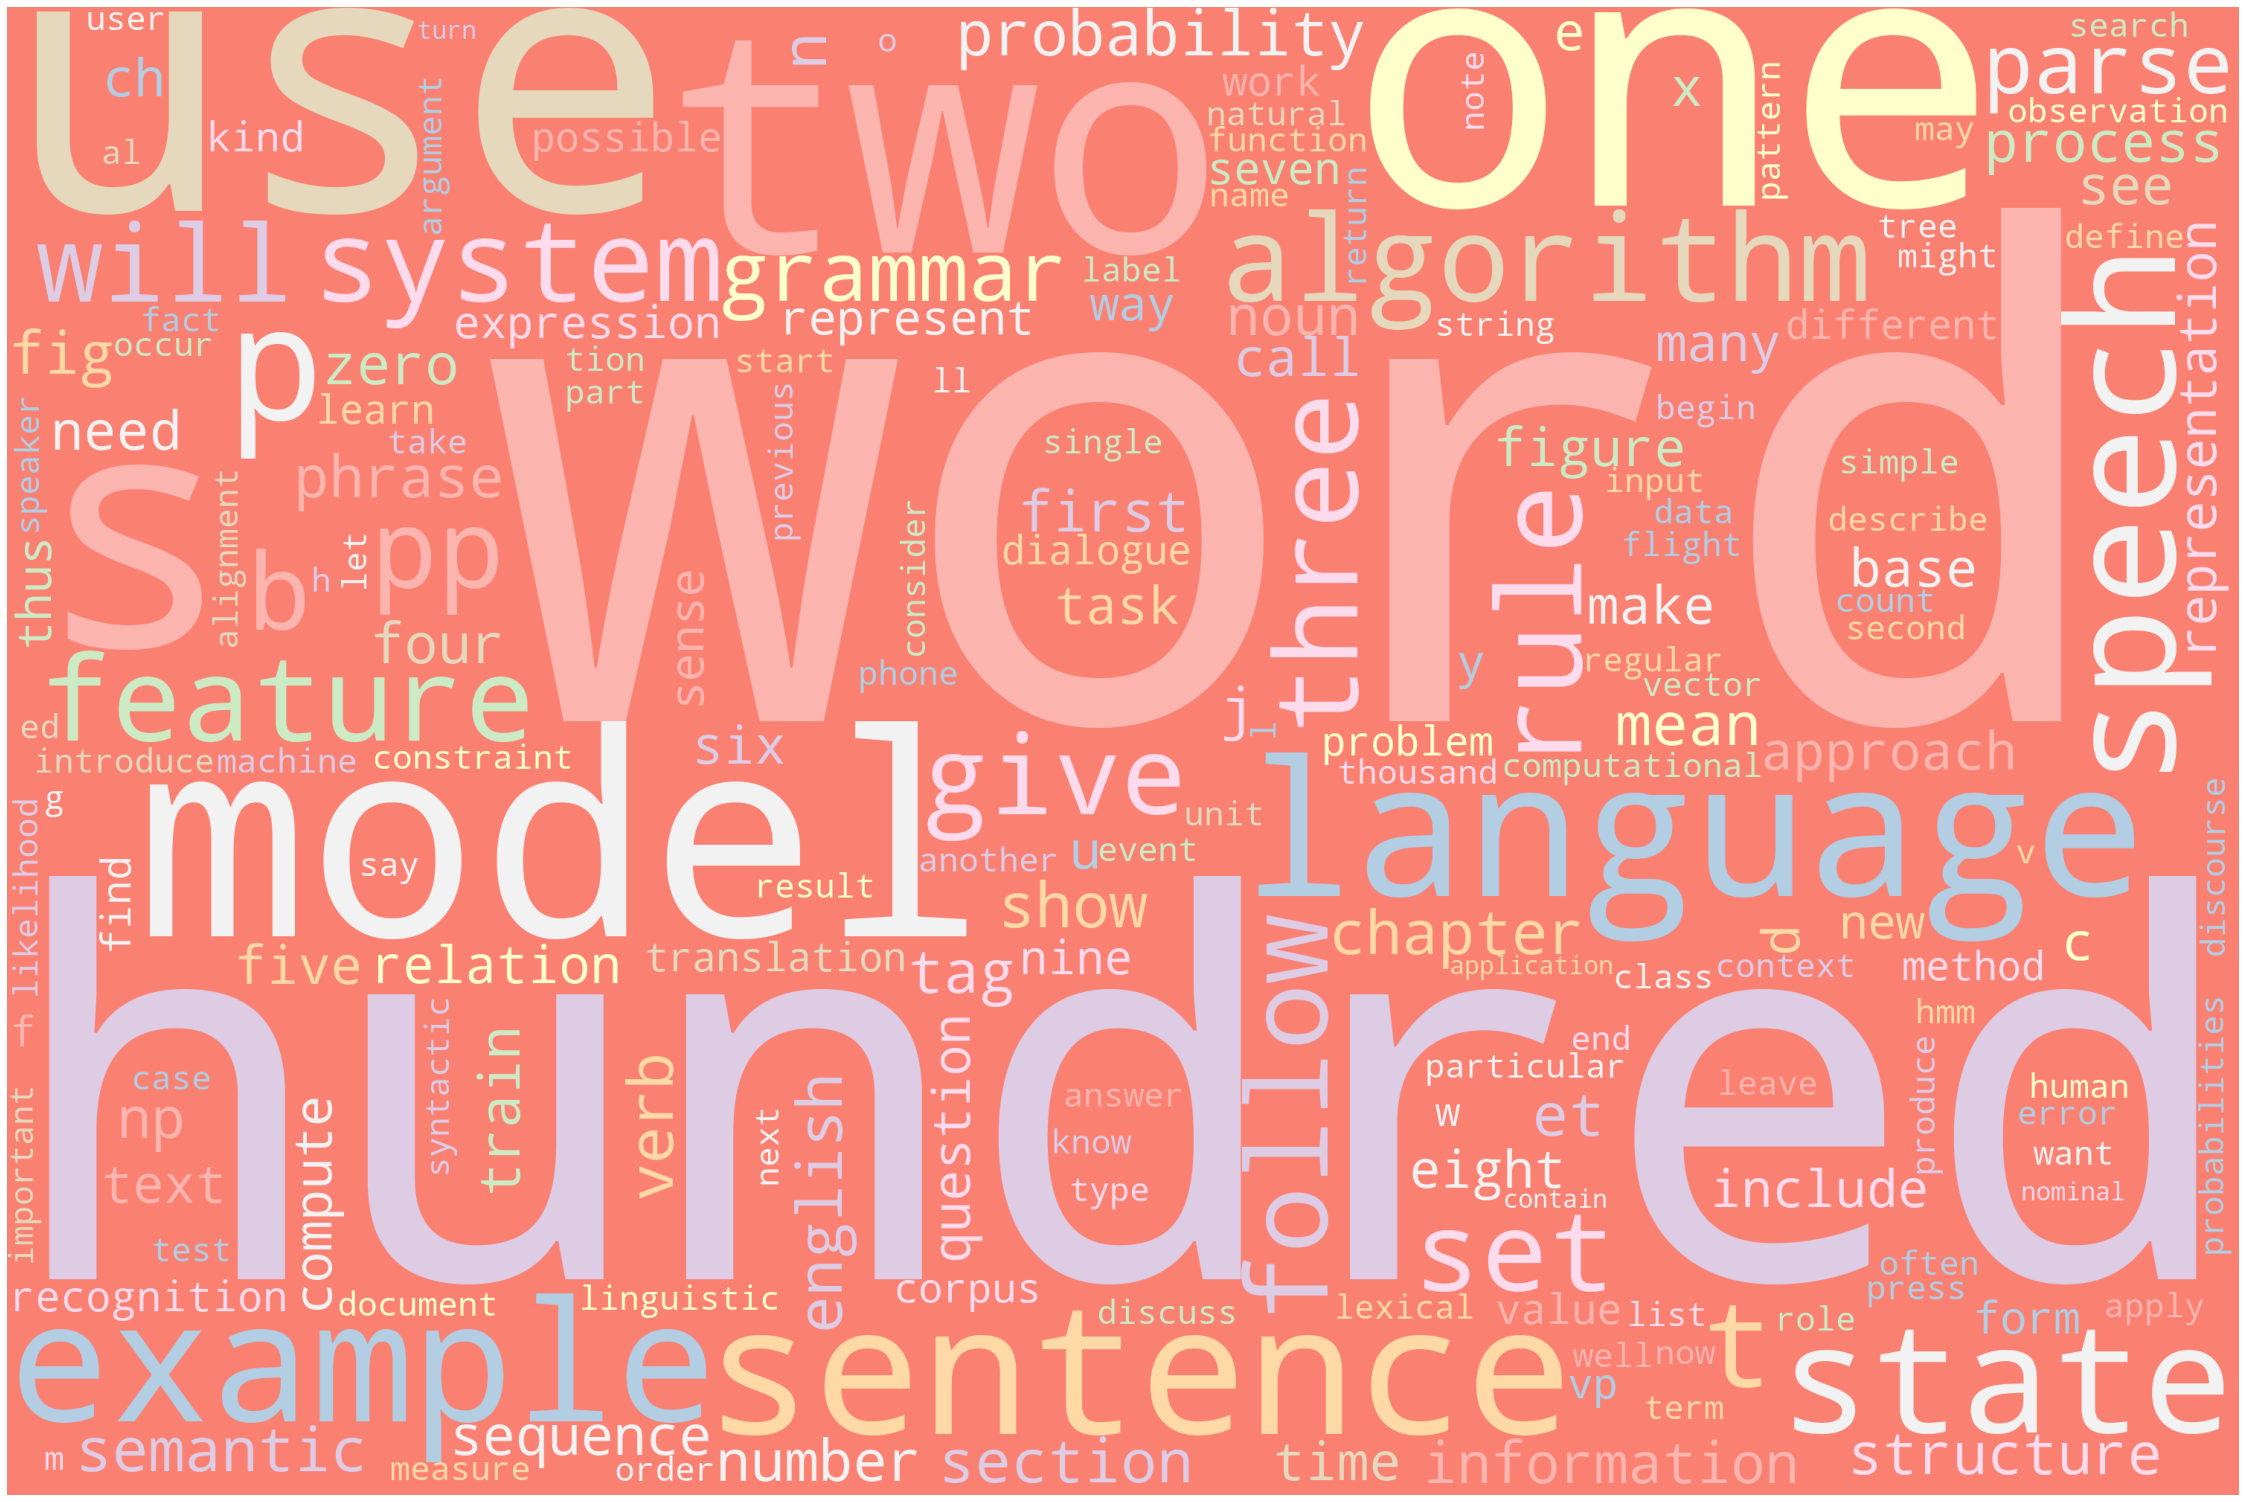

In [64]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(word_tokens))

plot_cloud(wordcloud)

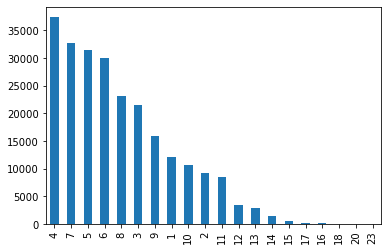

In [65]:
length = [len(word) for word in word_tokens]
pd.Series(length).value_counts()[:20].plot(kind='bar')

In [66]:
from collections import Counter

In [67]:
def tag_treebank(text):
  tokenized=nltk.word_tokenize(text)
  tagged=nltk.pos_tag(tokenized)
  return tagged

In [68]:
from collections import Counter
def get_counts(tags):
  counts = Counter( tag for word,  tag in tags)
  return counts

In [69]:
book_tags=tag_treebank(book_text)
book_pos_count=get_counts(book_tags)

In [71]:
len(book_pos_count)

37

In [72]:
book_pos_count

Counter({'NN': 123020,
         'IN': 51432,
         'DT': 45190,
         'CD': 9768,
         'JJ': 45809,
         'NNS': 15776,
         'MD': 4619,
         'VB': 26414,
         'CC': 15708,
         'VBD': 1858,
         'VBN': 4336,
         'VBP': 13651,
         'RB': 13011,
         'TO': 8558,
         'VBZ': 2106,
         'VBG': 749,
         'NNP': 774,
         'JJR': 1278,
         'FW': 581,
         'WRB': 1367,
         'PRP': 7619,
         'RBR': 735,
         'WDT': 2892,
         'PRP$': 1644,
         'JJS': 685,
         'RP': 544,
         'PDT': 376,
         'WP': 591,
         'RBS': 365,
         'EX': 236,
         'WP$': 75,
         'POS': 3,
         'NNPS': 3,
         'UH': 10,
         'SYM': 12,
         '$': 2,
         "''": 2})